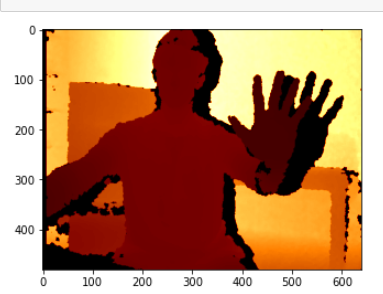

In [1]:
from IPython.display import Image
Image(filename='Images/Depth_test.png') 

In [ ]:
from IPython.display import clear_output
import numpy as np
from openni import openni2
from openni import _openni2 as c_api
import pylab as plt

openni2.initialize(r"C:\Program Files\OpenNI2\Redist")  
dev = openni2.Device.open_any()

depth_stream = dev.create_depth_stream()
depth_stream.start()


def read_stream(stream):
    frame = stream.read_frame()
    img = None
    frame_data = frame.get_buffer_as_uint16()
    # the depth data is more comprehensive than 0-255 (0 to lots); 0 means it is 
    # invalid, and otherwise, bigger means farther away.
    # returns mm distance, I think
    # depth data supposedly has the player index too, which you can remove with
    # bit shifting (I think it is 2 bytes?)
    # distance = depthData >> DepthImageFrame.PlayerIndexBitmaskWidth
    # player = depthData & DepthImageFrame.PlayerIndexBitmask

    img = np.array(np.frombuffer(frame_data, dtype=np.uint16), dtype=np.uint16)
    # the frame width isn't necessarily accurate?
    img.shape = (frame.height, -1)
    return img



while True:
    depth = read_stream(depth_stream)
    clear_output(wait=True)

    plt.imshow(depth, cmap='afmhot')
    plt.show()


depth_stream.stop()


openni2.unload()


# Simple hand detection based on depth mean

In [ ]:
Image(filename='Images/Depth_test.png') 

In [ ]:
#from primesense import openni2
from IPython.display import clear_output
import numpy as np
from primesense import openni2
from primesense import _openni2 as c_api
import pylab as plt
from sklearn.preprocessing import MinMaxScaler

openni2.initialize(r"C:\Program Files\OpenNI2\Redist")     # can also accept the path of the OpenNI redistribution
dev = openni2.Device.open_any()

depth_stream = dev.create_depth_stream()
depth_stream.start()


def read_stream(stream):
    frame = stream.read_frame()
    frame_data = frame.get_buffer_as_uint16()
    img = np.array(np.frombuffer(frame_data, dtype=np.uint16), dtype=np.uint16)
    img.shape = (frame.height, -1)
    return img


while True:
    depth = read_stream(depth_stream)
    clear_output(wait=True)
    
    #Delete everything further then 2000 depth units
    depth = np.where(depth > 2000, 0 , depth)
    
    #Get mean from objects rejestred in 2000 depth units range (eg. human in 2 meteres distance)
    mean_array = depth[depth>1]
    mean = np.mean(mean_array)

    #Extract hands
    depth = np.where(depth > mean-300, 0 , depth)

    
    plt.imshow(depth, cmap='gray')
    plt.show()


depth_stream.stop()


openni2.unload()
